In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from scipy import stats
import statsmodels.api as sm

In [2]:
tickers  = ["FB", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2012-05-18 to 2019-12-02
Data columns (total 2 columns):
FB       1897 non-null float64
^GSPC    1897 non-null float64
dtypes: float64(2)
memory usage: 44.5 KB


In [4]:
data.head()

,FB,^GSPC
Date,,
2012-05-18,38.230000,1295.219971
2012-05-21,34.029999,1315.989990
2012-05-22,31.000000,1316.630005
2012-05-23,32.000000,1318.859985
2012-05-24,33.029999,1320.680054


In [5]:
data.corr()

,FB,^GSPC
FB,1.000000,0.960586
^GSPC,0.960586,1.000000


In [6]:
x_con = sm.add_constant(data["FB"])
y = data["^GSPC"]

In [9]:
model = sm.OLS(y, x_con).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^GSPC   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 2.263e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:42:30   Log-Likelihood:                -11943.
No. Observations:                1897   AIC:                         2.389e+04
Df Residuals:                    1895   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1308.0223      6.543    199.903      0.000    1295.189    1320.855
FB             8.0435      0.053    150.427      0.000       7.939       8.148
==============================================================================
Omnibus:                      176.284   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.826
Skew:                           0.023   Prob(JB):                     2.05e-12
Kurtosis:                       2.176   Cond. No.                         266.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.predict()

array([1615.52510414, 1581.74241542, 1557.37063279, ..., 2932.80842406,
       2929.91276064, 2914.30835905])

In [15]:
summ = stats.linregress(data["FB"], data["^GSPC"])

In [16]:
summ.rvalue

0.9605864568147011

Lets plot a scatter plot for the data to test out model 

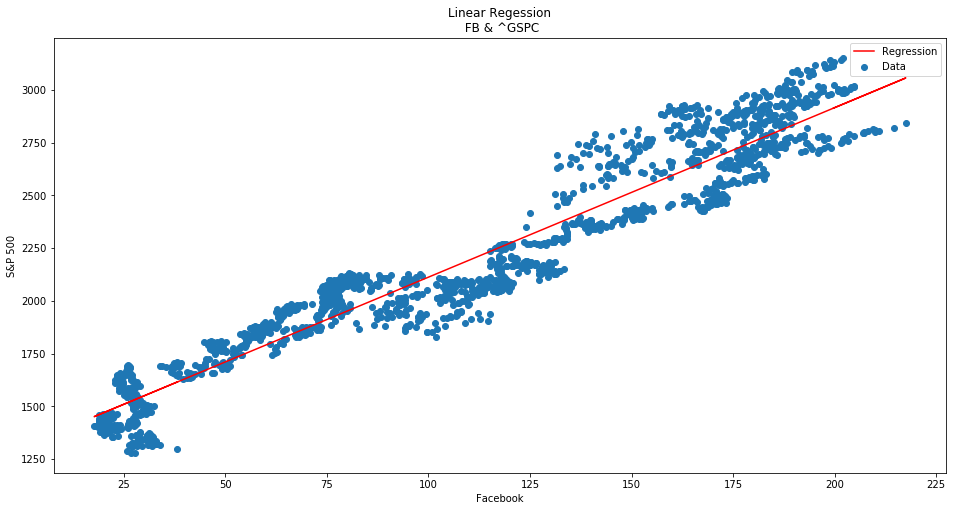

In [28]:
plt.figure(figsize=(16,8))
regression_line = model.predict()
plt.scatter(data["FB"], data["^GSPC"], label = "Data")
plt.plot(data["FB"], regression_line, label = "Regression", color = "r" )
plt.xlabel("Facebook")
plt.ylabel("S&P 500")
plt.title("Linear Regession\n FB & ^GSPC")
plt.legend()
plt.show()